## Carga y exploración inicial

In [ ]:
import pandas as pd

file_path = 'data/Datos_proyecto.xlsx'

try:
    df = pd.read_excel(file_path)
    print("¡Archivo cargado exitosamente!")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta '{file_path}'.")
    df = pd.DataFrame()


if not df.empty:
    
    # a. Vistazo rápido a las primeras 5 filas
    print("\n--- Primeras 5 filas de los datos: ---")
    display(df.head())
    
    # b. Obtener un resumen del DataFrame.
    print("\n--- Información general del DataFrame: ---")
    df.info()
    
    # c. Contar cuántas filas hay para cada categoría (label).
    print("\n--- Distribución de las clases (labels): ---")
    print(df['labels'].value_counts())

¡Archivo cargado exitosamente!

--- Primeras 5 filas de los datos: ---


,textos,labels
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4
1,Para los niños más pequeños (bebés y niños peq...,4
2,"Además, la formación de especialistas en medic...",3
3,En los países de la OCDE se tiende a pasar de ...,4
4,Este grupo se centró en las personas que padec...,3



--- Información general del DataFrame: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB

--- Distribución de las clases (labels): ---
labels
4    1025
3     894
1     505
Name: count, dtype: int64


No hay filas nulas, pero hay más labels de las categorías 4 y 3 que de 1, por lo que el modelo podría tender a predecir 4 o 3 simplemente porque aparece más veces.

C:\Users\carlo\AppData\Local\Temp\ipykernel_18000\1462879198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=df, palette='viridis')


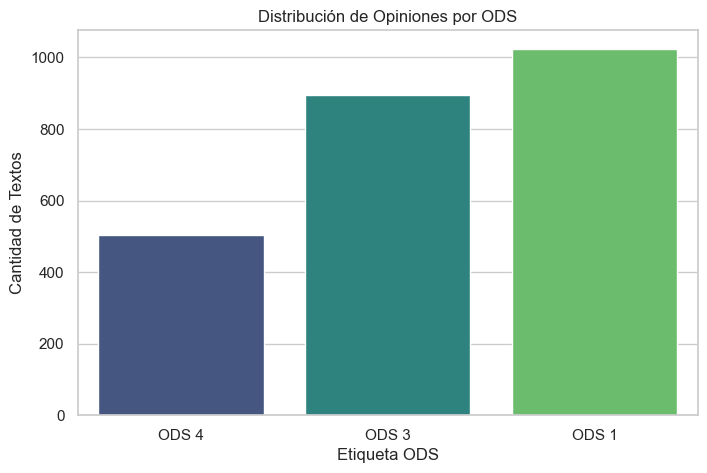

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='labels', data=df, palette='viridis')
plt.title('Distribución de Opiniones por ODS')
plt.xlabel('Etiqueta ODS')
plt.ylabel('Cantidad de Textos')
plt.xticks(ticks=[0, 1, 2], labels=['ODS 4', 'ODS 3', 'ODS 1'])
plt.show()

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
!pip install spacy==3.7.0
!pip install https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.7.0/es_core_news_sm-3.7.0-py3-none-any.whl


Found existing installation: spacy 3.7.0
Uninstalling spacy-3.7.0:
  Successfully uninstalled spacy-3.7.0


You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.7.0-cp312-cp312-win_amd64.whl.metadata (26 kB)
Using cached spacy-3.7.0-cp312-cp312-win_amd64.whl (11.7 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 487.6 kB/s eta 0:00:27
     - -------------------------------------- 0.4/12.9 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.9 MB 7.6 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.9 MB 14.2 MB/s eta 0:00:01
     --------- ------------------------------ 3.0/12.9 MB 12.1 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.9 MB 13.4 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.9 MB 18.1 MB/s eta 0:00:01
     ----------------------- ---------------- 7.4/12.9 MB 19.0 MB/s eta 0:00:01
     ----------------------- ---------------- 7.6/12.9 MB 18.0 MB/s eta 0:00:01
     -------------------------- ------------- 8.7/12.9 MB 17

In [7]:
import re
import spacy
from nltk.corpus import stopwords

# Cargar el modelo de español de spacy. Spacy se va a encargar de la lematización.
nlp = spacy.load("es_core_news_sm")
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar puntuación y números
    texto = re.sub(r'[^a-záéíóúñü]', ' ', texto)
    
    # Lematización y eliminación de stop words
    doc = nlp(texto)
    tokens_limpios = [token.lemma_ for token in doc if token.text not in stop_words and len(token.text) > 2]
    
    return " ".join(tokens_limpios)

df['texto_limpio'] = df['textos'].apply(limpiar_texto)

print("--- Comparación del texto original y el texto limpio ---")
display(df[['textos', 'texto_limpio']].head())

--- Comparación del texto original y el texto limpio ---


,textos,texto_limpio
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",aprendizaje educación considerar sinónir escol...
1,Para los niños más pequeños (bebés y niños peq...,niño pequeño bebé niño pequeño capacitación es...
2,"Además, la formación de especialistas en medic...",además formación especialista medicina general...
3,En los países de la OCDE se tiende a pasar de ...,país ocde tender pasar curso obligatorio optat...
4,Este grupo se centró en las personas que padec...,grupo centrar persona padecer trastorno mental...
